In [1]:
import pandas as pd
import numpy as np
import platform #os 정보를 가져 올 수 있는 모듈

from matplotlib import font_manager, rc # font_manager : 폰트 관리 모듈, rc : 폰트 변경 모듈
from matplotlib import pyplot as plt # 시각화 도구
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False # 유니코드 표현 설정하기

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # OS가 APPLE(Darwin)이면 AppleGothic으로 폰트 설정
elif platform.system() == 'Windows':
    path="c:/Windows/Fonts/malgun.ttf" #OS가 윈도우즈면 맑은 고딕으로 설정
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown System... sorry~~~~')

In [2]:
df_yt = pd.read_csv("./data/KR_youtube_trending_data.csv")

In [3]:
df_yt.tail() # 뒷쪽 순위에 있는 자료들만 불러오기

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
92349,not4IxXOQaA,[#술꾼도시여자들/6회] 오늘도 술 없이 버틸 수가 없는 이선빈 X 정은지의 사회생...,2021-11-13T14:45:03Z,UCxLc0zV-d2elxan2nc2xRCA,ᄐᄇᄐᄇ TVTV,24,2021-11-25T00:00:00Z,ㅌㅂㅌㅂ|술꾼도시여자들|술꾼도시여자들 결말|술꾼도시여자들 다시보기|술꾼도시여자들 드...,1255565,7785,254,334,https://i.ytimg.com/vi/not4IxXOQaA/default.jpg,False,False,#티빙에서스트리밍 #티빙오리지널 #술꾼도시여자들레전드 장면만 모아 모아묻지도 따지지...
92350,l60AVqEQ08E,정동원 - 잘가요 내사랑 (GoodBye My Love) M/V teaser 2,2021-11-16T09:00:16Z,UCrLQ0ovys23H9xBV6U-Sd4A,정동원TV,22,2021-11-25T00:00:00Z,[None],136001,10938,85,1188,https://i.ytimg.com/vi/l60AVqEQ08E/default.jpg,False,False,"그리움, 아낌없이 주는 나무2021.11.17 6PM (KST) Release#정동..."
92351,M_uGV2L5q3s,수능 영어를 풀어본 영국 고등학생들…!!?,2021-11-10T11:40:20Z,UCg-p3lQIqmhh7gHpyaOmOiQ,영국남자 Korean Englishman,23,2021-11-25T00:00:00Z,Korean|영국남자|영국|조쉬|올리|Josh|Ollie|KoreanEnglish|...,3950354,166126,1130,13180,https://i.ytimg.com/vi/M_uGV2L5q3s/default.jpg,False,False,오늘은 고등학생들과 유명한 수능 문제들을 풀어보러 풀햄고로 돌아왔습니다! 잠시나마 ...
92352,WguVom3vXl0,고기로 고백하는 방법,2021-11-12T10:15:01Z,UCT3CumbFIJiW33uq0UI3zlg,고기남자 MeatMan,26,2021-11-25T00:00:00Z,고기남자|하트토마호크|고기접착제|수제어묵|어묵탕|부꾸미|수수부꾸미|토마호크|토마호크...,468711,11993,1092,3328,https://i.ytimg.com/vi/WguVom3vXl0/default.jpg,False,False,말로는 못하게씀 ...
92353,YQRj6v2VMGU,캄차카에서 곰 추격하기 - 러시아 여행 [3],2021-11-15T11:07:11Z,UC7Krez5EI8pXKHnYWsE-zUw,소련여자 Soviet girl in Seoul,19,2021-11-25T00:00:00Z,여행|러시아여행|여행유튜버|캄차카|squidgame|오징어게임|kamchatka|등...,237503,7946,76,1512,https://i.ytimg.com/vi/YQRj6v2VMGU/default.jpg,False,False,하리보 맛있지 그래나의 티셔츠 : https://url.kr/4xjab5나의 인스타...


In [5]:
# trending_date 같은 것도 문자열로 들어오니까 이런거 날짜 데이터로 바꿔줄 수 있어야 함
# view_count가 가끔 문자열로 뜰 때도 있는데 이런 건 정수 형태로 바꿔줘야겠지 
# so info 찍어서 꼭 내가 다룰 데이터가 어떤 형식인지 확인해봐야 한다.

df_yt.info() # .info()로 체크하기

# 필요 컬럼 추리기

In [6]:
column_names = ['title', 'channelTitle', 'view_count',]
df_view_cnt = df_yt[column_names]
df_view_cnt.head()

,title,channelTitle,view_count
0,안녕하세요 보겸입니다,보겸 BK,5947503
1,부락토스의 계획 [총몇명 프리퀄],총몇명,963384
2,평생 반성하면서 살겠습니다.,양팡 YangPang,2950885
3,안녕하세요 꽈뚜룹입니다.,꽈뚜룹 Quaddurup,1743374
4,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,JYP Entertainment,3433885


In [7]:
df_yt.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [8]:
df_view_sorted = df_view_cnt.sort_values(by='view_count', ascending=False)
df_view_sorted

,title,channelTitle,view_count
55138,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,296314174
54938,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,292502967
54729,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,289350312
54519,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,285698612
54284,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,282265069
...,...,...,...
24599,Hello 2021 Korea | 크리에이터와 함께하는 Goodbye 2020,YouTube Korea,0
25512,Hello 2021 Korea | 크리에이터와 함께하는 Goodbye 2020,YouTube Korea,0
48130,Earth Day 2021 Doodle,GoogleDoodles,0
47461,Earth Day 2021 Doodle,GoogleDoodles,0


# 중복 제거 (조회수가 제일 많았던 데이터만 남기기) 

In [9]:
drop_by_col = ["title", "channelTitle"]
df_drop_sorted = df_view_sorted.drop_duplicates(drop_by_col, keep = 'first')
# keep = 지금 내림차순 해놨으니까 조회수 제일 많은 거 보고 싶음.
# 그럼 첫번째 것만 남기고 싶은거니까 first것만 남기면 됨
df_drop_sorted

,title,channelTitle,view_count
55138,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,296314174
2733,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,262319276
67539,BTS (방탄소년단) 'Permission to Dance' Official MV,HYBE LABELS,194795844
79542,LISA - 'LALISA' M/V,BLACKPINK,192376395
3426,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK,184778248
...,...,...,...
2989,[싸꼰_LIVE] 사사건건 풀방송 라이브_373일차_0901(화),「싸꼰」사사건건,17294
871,[싸꼰_LIVE] 사사건건 풀방송 라이브_364일차_0818(화),「싸꼰」사사건건,16957
6465,"[정면]'국시보겠다'면서, 사과없는 의대생들- 신장식 변호사, 유지만 시사저널 기자...",YTN 라디오,15845
25295,Hello 2021 Korea | 크리에이터와 함께하는 Goodbye 2020,YouTube Korea,0


In [10]:
df_channel_view_sum = df_drop_sorted.groupby('channelTitle').sum()
df_channel_view_sum

,view_count
channelTitle,
#Like_Football 라이크풋볼,670272
#ing 샾잉,2151457
(G)I-DLE (여자)아이들 (Official YouTube Channel),62336338
(G)I-DLE - Topic,1583668
(MUTUBE)와꾸대장봉준,4468035
...,...
흰수염고래스포츠,1098004
히밥heebab,11091935
히스토리,3162128


In [11]:
df_channel_view = df_channel_view_sum.sort_values(by="view_count",ascending=False)
df_channel_view

,view_count
channelTitle,
BLACKPINK,1062770741
SMTOWN,1031392256
HYBE LABELS,957258789
BANGTANTV,828632551
JYP Entertainment,824438024
...,...
율리예스,24643
트레져헌터,23354
겜순이녜 Soon TV,20729


# top 100 조회

In [12]:
df_top100 = df_channel_view[:100]
df_top100

,view_count
channelTitle,
BLACKPINK,1062770741
SMTOWN,1031392256
HYBE LABELS,957258789
BANGTANTV,828632551
JYP Entertainment,824438024
...,...
사나고 Sanago,43230004
잼스터,41837731
SBS Drama,41778654


In [13]:
# df_top100에 들어있던 인덱스를 데이터로 써야 하니까 drop 안함
df_top100 = df_top100.reset_index()
df_top100

,channelTitle,view_count
0,BLACKPINK,1062770741
1,SMTOWN,1031392256
2,HYBE LABELS,957258789
3,BANGTANTV,828632551
4,JYP Entertainment,824438024
...,...,...
95,사나고 Sanago,43230004
96,잼스터,41837731
97,SBS Drama,41778654
98,OH MY GIRL,41620971


# Seaborn으로 TOP100 채널 시각화

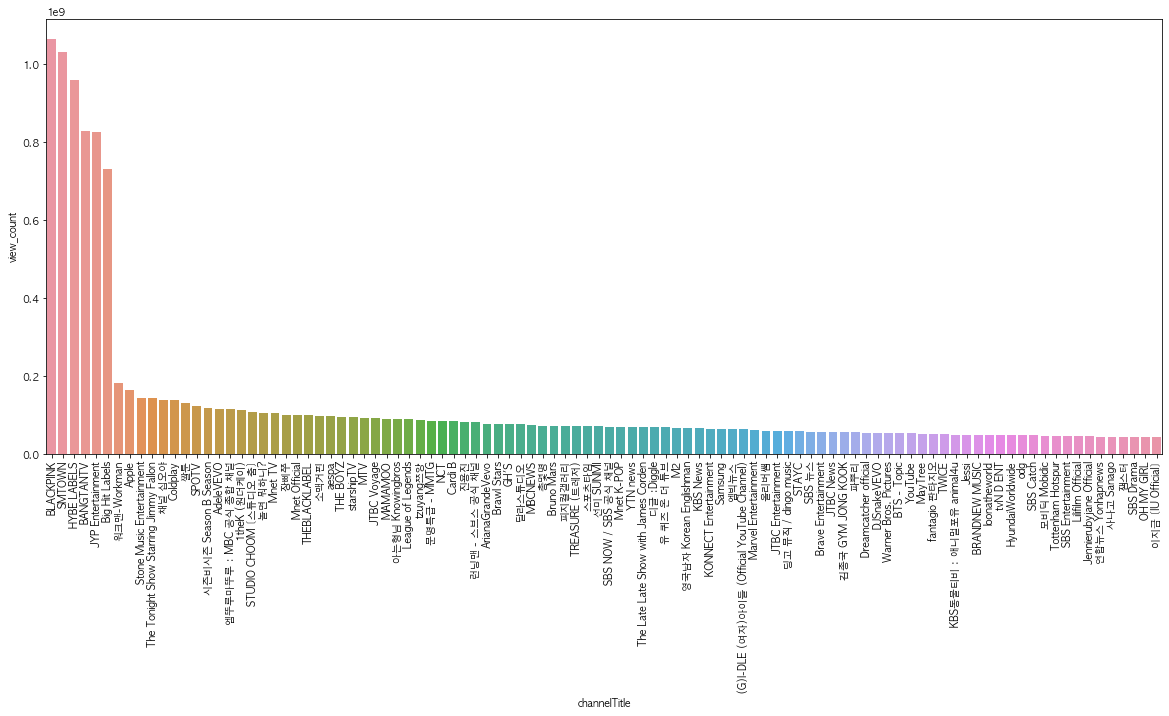

In [14]:
import seaborn as sns

plt.figure(figsize=(20,8))
plt.xticks(rotation=90) # 세로 각도 의미
sns.barplot(x="channelTitle", y="view_count", data=df_top100)
plt.show()

### 실습 :: 트렌딩에 가장 많이 올라온 채널 top 100

In [15]:
df_channel = df_yt[["channelTitle", "video_id"]]
df_channel = df_channel.groupby("channelTitle").count()
df_channel_sort = df_channel.sort_values(by="video_id", ascending=False)
df_channel_title = df_channel_sort.reset_index() 
df_channel_title.head()

,channelTitle,video_id
0,짤툰,608
1,SPOTV,593
2,파뿌리,442
3,총몇명,441
4,BANGTANTV,425


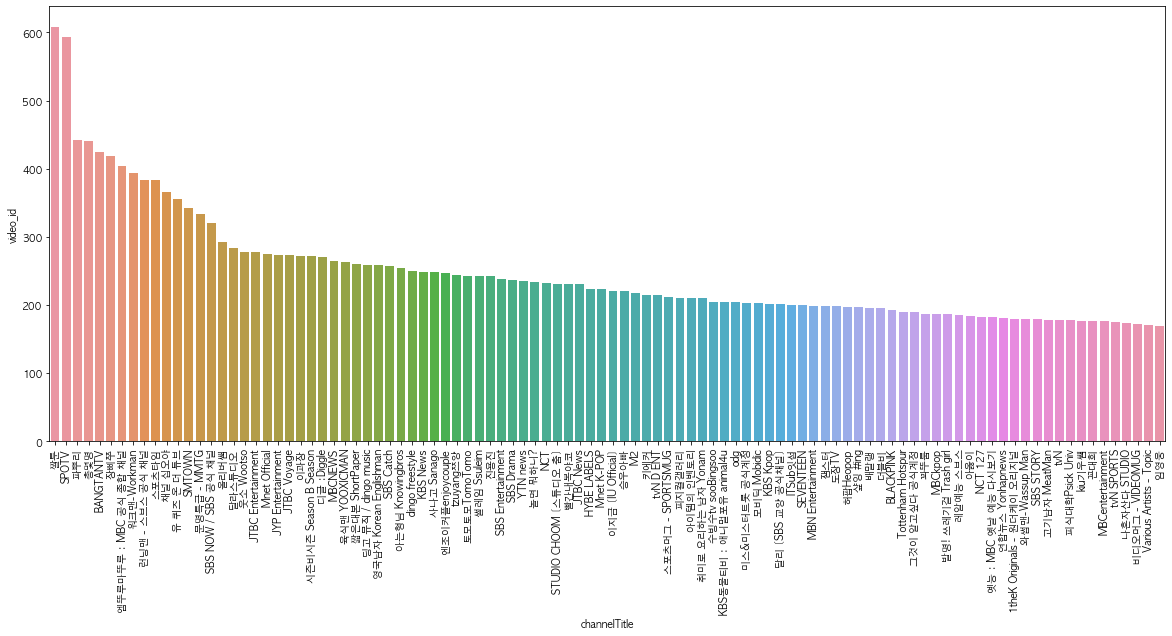

In [16]:
df_channel_top100 = df_channel_title[:100]
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.barplot(x="channelTitle", y="video_id", data=df_channel_top100)
plt.show()

# 인기 영상 키워드 분석

In [21]:
cols = ["title", "view_count"]
df_title = df_yt[cols]

# 정렬
df_sorted = df_title.sort_values(by="view_count", ascending=False)
df_sorted.head()

,title,view_count
55138,BTS (방탄소년단) 'Butter' Official MV,296314174
54938,BTS (방탄소년단) 'Butter' Official MV,292502967
54729,BTS (방탄소년단) 'Butter' Official MV,289350312
54519,BTS (방탄소년단) 'Butter' Official MV,285698612
54284,BTS (방탄소년단) 'Butter' Official MV,282265069


In [22]:
# 제목 중복 제거
df_sorted = df_sorted.drop_duplicates(["title"], keep='first')
df_sorted.head()

,title,view_count
55138,BTS (방탄소년단) 'Butter' Official MV,296314174
2733,BTS (방탄소년단) 'Dynamite' Official MV,262319276
67539,BTS (방탄소년단) 'Permission to Dance' Official MV,194795844
79542,LISA - 'LALISA' M/V,192376395
3426,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,184778248


# 제목만 가져오기

In [23]:
df_hot = df_sorted.copy()
df_hot['title'].values

array(["BTS (방탄소년단) 'Butter' Official MV",
       "BTS (방탄소년단) 'Dynamite' Official MV",
       "BTS (방탄소년단) 'Permission to Dance' Official MV", ...,
       "[정면]'국시보겠다'면서, 사과없는 의대생들- 신장식 변호사, 유지만 시사저널 기자9/25.../ YTN 라디오",
       'Hello 2021 Korea | 크리에이터와 함께하는 Goodbye 2020',
       'Earth Day 2021 Doodle'], dtype=object)

In [25]:
df_title_kor = df_hot['title'].str.replace("[^가-힣₩s]", "")
# 완성형 한글 공백이 아닌 것들 중에 한글자 -처음부터 끝까지를 의미
# 영어면 a-zA-Z₩s : 영어 소문자 첨부터 끝까지, 대문자 첨부터 끝까지
# ₩s : 공백문자 하나를 의미 (스페이스바, 엔터)
# ^: 아닌 것 not 을 의미
# --> 그래서 이거 전체가 공백이 아닌 것을 의미
# 즉, 완성형 한글 또는 공백이 아닌 모든 글자를 비어있는 문자열로 바꾼다.

df_hot['title_refined'] = df_title_kor
df_hot

/var/folders/l6/zf_y8js55058y519pbd3k9480000gn/T/ipykernel_13791/3802051308.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_title_kor = df_hot['title'].str.replace("[^가-힣₩s]", "")


,title,view_count,title_refined
55138,BTS (방탄소년단) 'Butter' Official MV,296314174,방탄소년단
2733,BTS (방탄소년단) 'Dynamite' Official MV,262319276,방탄소년단
67539,BTS (방탄소년단) 'Permission to Dance' Official MV,194795844,방탄소년단ss
79542,LISA - 'LALISA' M/V,192376395,
3426,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,184778248,
...,...,...,...
2989,[싸꼰_LIVE] 사사건건 풀방송 라이브_373일차_0901(화),17294,싸꼰사사건건풀방송라이브일차화
871,[싸꼰_LIVE] 사사건건 풀방송 라이브_364일차_0818(화),16957,싸꼰사사건건풀방송라이브일차화
6465,"[정면]'국시보겠다'면서, 사과없는 의대생들- 신장식 변호사, 유지만 시사저널 기자...",15845,정면국시보겠다면서사과없는의대생들신장식변호사유지만시사저널기자라디오
25295,Hello 2021 Korea | 크리에이터와 함께하는 Goodbye 2020,0,크리에이터와함께하는


In [26]:
import re
df_hot = df_hot[ df_hot['title_refined'].apply(lambda x : re.sub('[^가-힣]', '', x)) != '' ]
df_hot # 아무 것도 없거나 공백만 있는 문자열 다 제거해줌
# 데이터 하나하나를 다 lambda라는 함수에 집어 넣음. (x에_ parameter)
# 실제 구현 내용은 re.sub에서 실행된다

,title,view_count,title_refined
55138,BTS (방탄소년단) 'Butter' Official MV,296314174,방탄소년단
2733,BTS (방탄소년단) 'Dynamite' Official MV,262319276,방탄소년단
67539,BTS (방탄소년단) 'Permission to Dance' Official MV,194795844,방탄소년단ss
18935,BTS (방탄소년단) 'Life Goes On' Official MV,161912058,방탄소년단s
84939,aespa 에스파 'Savage' MV,96074799,s에스파
...,...,...,...
3014,[2020 K리그] 18R 울산 vs 서울 하이라이트,17814,리그울산s서울하이라이트
2989,[싸꼰_LIVE] 사사건건 풀방송 라이브_373일차_0901(화),17294,싸꼰사사건건풀방송라이브일차화
871,[싸꼰_LIVE] 사사건건 풀방송 라이브_364일차_0818(화),16957,싸꼰사사건건풀방송라이브일차화
6465,"[정면]'국시보겠다'면서, 사과없는 의대생들- 신장식 변호사, 유지만 시사저널 기자...",15845,정면국시보겠다면서사과없는의대생들신장식변호사유지만시사저널기자라디오


# 제목에서 단어 추출, 빈도수 구하기
    * 인기 영상 키워드 분석하기

In [58]:
from soynlp.word import WordExtractor

* 단어 점수: 단어가 될 수 있는 수치
'''
예시 1. 나는 사과를 먹는다 -> [나, 사과]
예시 2. 아이오아이는 가수다. -> [가수]
'''
soynlp는 연속되어지는 문자의 빈도, 경계점수를 활용해서 신조어를 단어로 인식한다.
* 연속되어지는 문자의 빈도 : 응집도 (cohension)
* 경계점수 (boundary entropy)

In [59]:
뉴스에서 아이오아이가 처음 등장했다.

.[속보] 아이오아이 앨범 어쩌고 저쩌고
[2보] 아이오아이 콘서트 개최 ~.

랜친실안
아이오아이 가
아이오아이 는
아이오아이 은
아이오아이 이
아이오아이 가
아이오아이 이가

SyntaxError: invalid syntax (1175772465.py, line 1)

In [60]:
word_ext = WordExtractor(
    min_frequency=10, # 최소 등장 빈도
    min_cohesion_forward=0.05, # 앞 쪽에 등장하는 단어의 최소 cohension 스코어
    min_right_branching_entropy = 0.0 # 특정 단어 뒷쪽에 등장하는 문자에 대한 혼잡도의 최솟값
)

word_ext.train(df_hot['title_refined'].values) # 문장들을 입력시켜서 단어 훈련
words = word_ext.extract() # 단어 추출

training was done. used memory 0.255 Gb
all cohesion probabilities was computed. # words = 1107
all branching entropies was computed # words = 859
all accessor variety was computed # words = 859


In [61]:
print(words['방']), (words['방탄']), (words['방탄소']), (words['방탄소년']), (words['방탄소년단'])
print(word.cohesion_forward, '돈t₩t₩t', word.right_branching_entropy)

Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=-0.0, right_branching_entropy=0.362210557135449, left_accessor_variety=1, right_accessor_variety=2, leftside_frequency=154, rightside_frequency=109)


NameError: name 'word' is not defined

In [62]:
from soynlp.tokenizer import LTokenizer

In [63]:

cohesion_score= {word : score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)
print("방 : {}".format(cohesion_score["방"]))
print("방탄 : {}".format(cohesion_score["방탄"]))
print("방탄소 : {}".format(cohesion_score["방탄소"]))
print("방탄소년 : {}".format(cohesion_score["방탄소년"]))
print("방탄소년단 : {}".format(cohesion_score["방탄소년단"]))

방 : 0
방탄 : 0.7792207792207793
방탄소 : 0.8753477972976035
방탄소년 : 0.9150688298561191
방탄소년단 : 0.9356002336989894


In [64]:
from soynlp.tokenizer import LTokenizer

# 응집도 점수만 뽑기
cohesion_score = { word : score.cohesion_forward for word, score in words.items() }

# 응집도 점수를 기반으로 해서 Tokenizer 만들기
tokenizer = LTokenizer(scores=cohesion_score)

In [65]:
df_hot['tokenize'] = df_hot['title_refined'].apply(lambda x : tokenizer.tokenize(x, remove_r=True))
df_hot

/var/folders/l6/zf_y8js55058y519pbd3k9480000gn/T/ipykernel_13791/1410837025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hot['tokenize'] = df_hot['title_refined'].apply(lambda x : tokenizer.tokenize(x, remove_r=True))


,title,view_count,title_refined,tokenize
55138,BTS (방탄소년단) 'Butter' Official MV,296314174,방탄소년단,[방탄소년단]
2733,BTS (방탄소년단) 'Dynamite' Official MV,262319276,방탄소년단,[방탄소년단]
67539,BTS (방탄소년단) 'Permission to Dance' Official MV,194795844,방탄소년단ss,[방탄소년단]
18935,BTS (방탄소년단) 'Life Goes On' Official MV,161912058,방탄소년단s,[방탄소년단]
84939,aespa 에스파 'Savage' MV,96074799,s에스파,[s에스파]
...,...,...,...,...
3014,[2020 K리그] 18R 울산 vs 서울 하이라이트,17814,리그울산s서울하이라이트,[리그울산s서울하이라이트]
2989,[싸꼰_LIVE] 사사건건 풀방송 라이브_373일차_0901(화),17294,싸꼰사사건건풀방송라이브일차화,[싸꼰사사건건풀방송라이브일차화]
871,[싸꼰_LIVE] 사사건건 풀방송 라이브_364일차_0818(화),16957,싸꼰사사건건풀방송라이브일차화,[싸꼰사사건건풀방송라이브일차화]
6465,"[정면]'국시보겠다'면서, 사과없는 의대생들- 신장식 변호사, 유지만 시사저널 기자...",15845,정면국시보겠다면서사과없는의대생들신장식변호사유지만시사저널기자라디오,[정면국시보겠다면서사과없는의대생들신장식변호사유지만시사저널기자라디오]


In [66]:
sum([[1,2,3],
    [4,5,6]], []) # 하나의 배열로 합치는 거당.

[1, 2, 3, 4, 5, 6]

# 50만 조회수 이상만 추출

In [67]:
hot_mask = df_hot['view_count'] >= 500000 
df_hot_top = df_hot[hot_mask]
df_hot_top

,title,view_count,title_refined,tokenize
55138,BTS (방탄소년단) 'Butter' Official MV,296314174,방탄소년단,[방탄소년단]
2733,BTS (방탄소년단) 'Dynamite' Official MV,262319276,방탄소년단,[방탄소년단]
67539,BTS (방탄소년단) 'Permission to Dance' Official MV,194795844,방탄소년단ss,[방탄소년단]
18935,BTS (방탄소년단) 'Life Goes On' Official MV,161912058,방탄소년단s,[방탄소년단]
84939,aespa 에스파 'Savage' MV,96074799,s에스파,[s에스파]
...,...,...,...,...
64088,[SMTM10] WINNER CYPHER - lIlBOI (래퍼 공개모집 ~7/31),500148,래퍼공개모집,[래퍼공개모집]
51952,[몰카]여자후배가 우리집에 배달을 온다면? 8탄 Ft. 이승윤,500125,몰카여자후배가우리집에배달을온다면탄이승윤,[몰카]
21351,"1화) SBS 웃찾사 폐지후 신용등급 8,9등급 까지 떨어져 버린 웃찾사 개그맨의 ...",500110,화웃찾사폐지후신용등급등급까지떨어져버린웃찾사개그맨의삶쓰리콤보개그맨정철욱,[화웃찾사폐지후신용등급등급까지떨어져버린웃찾사개그맨의삶쓰리콤보개그맨정철욱]
25553,혜리 Vlog | 갑자기 생긴 휴일🎶 혜리는 쉬는 날 뭘 할까? 아듀 2020!,500098,혜리갑자기생긴휴일혜리는쉬는날뭘할까아듀,[혜리갑자기생긴휴일혜리는쉬는날뭘할까아듀]


In [52]:
words = sum(df_hot_top['tokenize'], [])
words

['방탄소년단',
 '방탄소년단',
 '방탄소년단',
 '방탄소년단',
 's에스파',
 's에스파',
 '엔시티',
 '방탄소년단',
 '마피아',
 '엔시티',
 '방탄소년단',
 '엑소',
 's에스파',
 '방탄소년단',
 's소리꾼',
 '레드벨벳',
 '엔시티',
 '에버글로우',
 '에버글로우',
 '엔시티',
 '방탄소년단',
 '방탄소년단',
 '전소',
 '선미',
 '방탄소년단',
 '전소',
 '여자아이들',
 '방탄소년단',
 '방탄소년단',
 '방탄소년단',
 '세븐틴',
 '엔시티',
 '강다니엘',
 '방탄소년단',
 '오징어게임',
 '방탄소년단',
 '이달의소녀',
 '니쥬s',
 '아이',
 '니쥬',
 '브레이브걸스',
 '몬스타엑스',
 '더보이즈',
 '방탄소년단',
 '샤이니',
 '엔시티',
 '더보이즈',
 '세븐틴',
 '아스트로',
 '방탄소년단',
 '방탄소년단',
 '방탄소년단',
 '태민이데아',
 '아이',
 '엔시티',
 '넌날숨쉬게해',
 '강다니엘',
 '백현',
 '해야해',
 '방탄소년단',
 '씨엘씨s',
 '스테이씨',
 '방탄소년단',
 '선미',
 '청하',
 '드림캐쳐s',
 '선공개',
 '오마이걸',
 '브레이브걸스',
 '몬스타엑스',
 '아이',
 '방탄소년단',
 '원어스월하미인',
 '카이음',
 '스테이씨',
 '오겜진행요원의일상s',
 '마마무',
 '슈퍼',
 '투모로우바이투게더',
 '방탄소년단',
 '여자친구',
 '펜타곤s',
 '투모로우바이투게더',
 '아스트로',
 'ss',
 '에이',
 's프로미스나인',
 '비투비',
 '방탄소년단',
 '에이',
 's에스파',
 '슈퍼',
 '방탄소년단',
 '엔시티',
 'ss',
 '현아',
 '드림캐쳐',
 '방탄소년단',
 '그뒤에서자신의음악으로세계와만나다',
 '음',
 '오징어게임',
 '태민',
 '더보이즈',
 '에이',
 '샤이니',
 '유아숲의아이',
 '몬스타엑스s',
 '엔시티',
 '투모로우바이투게

# 단어들의 빈도를 파악

In [47]:
from collections import Counter

count = Counter(words) # 배열 안쪽 원소들이 등장한 빈도
words_dict = dict(count)
print(words_dict)


{'빈': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=0, right_branching_entropy=-0.0, left_accessor_variety=0, right_accessor_variety=1, leftside_frequency=19, rightside_frequency=0), '황': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=0.6931471805599453, right_branching_entropy=-0.0, left_accessor_variety=2, right_accessor_variety=1, leftside_frequency=30, rightside_frequency=34), '남': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=-0.0, right_branching_entropy=0.6909233093138181, left_accessor_variety=1, right_accessor_variety=2, leftside_frequency=52, rightside_frequency=15), '는': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=0, right_branching_entropy=0, left_accessor_variety=0, right_accessor_variety=0, leftside_frequency=0, rightside_frequency=42), '윤': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=0, right_branching_entropy=0, left_accessor_variety=0, right_a

In [54]:
from wordcloud import WordCloud

In [55]:
wordcloud = WordCloud(
    font_path="AppleGothic",
    background_color='white',
    width=500, height=500
).generate_from_frequencies(words_dict)

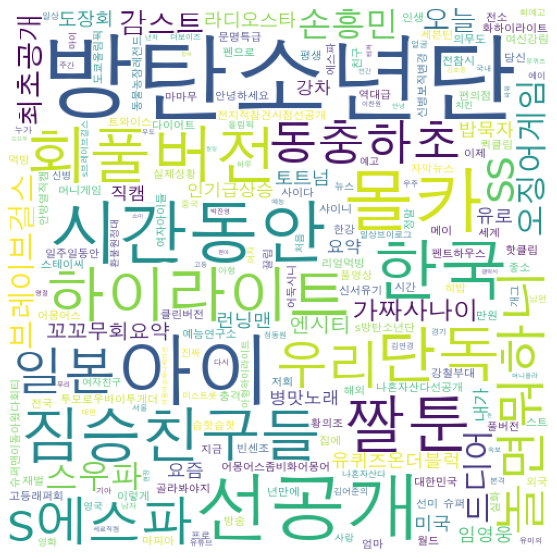

In [56]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off') # 틱 안보이게 하기
plt.show()